## Customer Intent Classification: Building models to identify customers likely to accept credit card offers

### Problem statement - 

The project pertains to the use of a dataset from Happy Customer Bank, a mid-sized private bank that aims to leverage advanced technological tools like machine learning to enhance their credit card sales. Specifically, the bank wants to cross-sell credit cards to its existing customers and has identified a cohort of eligible customers. The objective of the project is to assist the bank in identifying customers who are more likely to display an inclination towards purchasing the credit card, by utilizing data analytics and machine learning techniques.

To achieve this goal, various classification models, including logistic regression, KNN, random forests, and boosted trees, are developed to effectively discriminate and identify prospective customers. These models are utilized to forecast the likelihood of customers accepting the credit card offer.


### Summary -
The project aims to utilize data analytics and machine learning techniques to help Happy Customer Bank identify potential customers who are more likely to purchase their credit card, and thereby improve their cross-selling efforts. The development of classification models trained on the dataset is central to achieving this objective.

### Financial and Social Implications -
The project's potential solution could have significant financial implications by increasing the bank's cross-selling success rates and generating more revenue from its credit card products. Furthermore, it could have social implications by providing customers who could benefit from credit card products with a valuable tool and reducing the need for customers to seek credit from less favorable sources.




#### Source link - https://www.kaggle.com/datasets/swastikmohanty845/jobathon-may-2021-credit-card-lead-prediction?select=Train_Data.csv

### Data Source
The dataset that we used is from Analytics Vidhya Job-a-Thon, which was provided by the competetion organizers. The data is obtained from a hypothetical credit crad company and contains the information about customers's demographics, previous transactions, interaction with the company's agents. 

**Required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
url = "https://raw.githubusercontent.com/Dharshana03/Credit_card_prediction/main/Data/Train_Data.csv"
credit_card = pd.read_csv(url)

**Loading the dataset**

In [3]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


###Variable Info - 

•	ID -- Customer Unique Ids

•	Gender -- Customer Gender

•	Age -- Gender Age(In Years)

•	Region_Code -- Customer Region

•	Occupation -- Customer Occupation

•	Channel_Code -- Customer Channel Code (Encoded)

•	Vintage -- Customer Vintage(In Months)

•	Credit_Product -- Customer has any Active Credit Product

•	Avg_Account_Balance -- Customer in last 12 months balance

•	Is_Active -- Customer is active(In 3 Months)

•	Is_Lead -- Customer is interested In the Credit Card (0 : Customer is not interested 1 : Customer is interested)




In [4]:
credit_card.head(10)


,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [5]:
credit_card.describe()


,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


###Exploring the distribution of the target variable

Mean of interested customers : 0.24


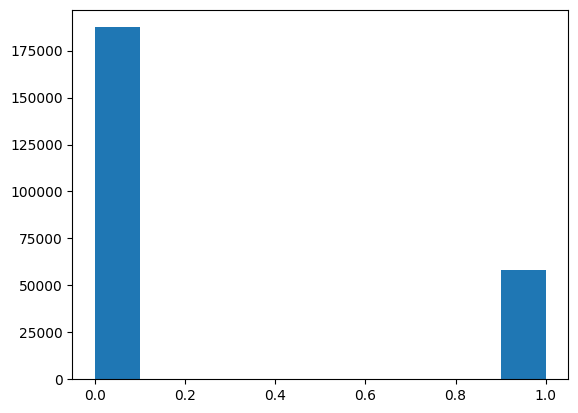

In [6]:
credit_card.Is_Lead.hist()
print("Mean of interested customers : %0.2f" %credit_card.Is_Lead.mean())
plt.grid(False)

**Inference - This is an imbalanced dataset.**

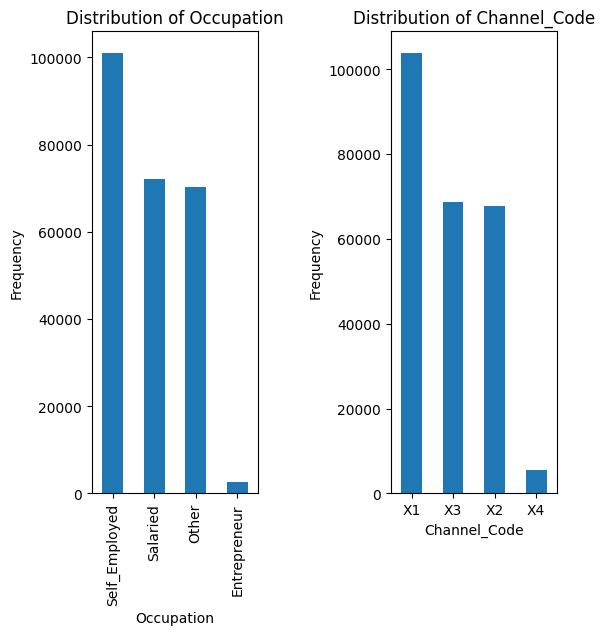

In [7]:
import matplotlib.pyplot as plt

# Count the frequency of each category in Occupation and Channel_Code columns
occ_counts = credit_card['Occupation'].value_counts()
chan_counts = credit_card['Channel_Code'].value_counts()

# Plot the results using a bar plot
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6, 6))
occ_counts.plot(kind='bar', ax=axes[0], rot=90)
chan_counts.plot(kind='bar', ax=axes[1], rot=0)


# Set titles and labels
axes[0].set_title('Distribution of Occupation')
axes[1].set_title('Distribution of Channel_Code')
axes[0].set_xlabel('Occupation')
axes[1].set_xlabel('Channel_Code')
axes[0].set_ylabel('Frequency')
axes[1].set_ylabel('Frequency')

# Adjust spacing between plots
plt.subplots_adjust(wspace=0.8)

# Show the plot
plt.show()


In [8]:
#removing the less frequent categories - "Entrepreneur" and "X4" from Occupation and Channel_Code features resp. This reduces bias in the model and it is less likely to predict these categories more accurately.
credit_card.drop(credit_card[(credit_card['Occupation'] == 'Entrepreneur') | (credit_card['Channel_Code'] == 'X4')].index, inplace=True)
print("No. of records after dropping the records: ", credit_card.shape[0])

No. of records after dropping the records:  237565


###Removing the redundant features

In [9]:
#  The variables - ID and region code do not provide any valuable information in predicting the target variable and therefore, can be considered redundant features.
credit_card_cleaned = credit_card.drop(["ID","Region_Code"],axis = 1)
credit_card_cleaned.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,Other,X3,43,No,1045696,No,0
1,Female,30,Salaried,X1,32,No,581988,No,0
2,Female,56,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,Salaried,X1,19,No,470454,No,0
4,Female,30,Salaried,X1,33,No,886787,No,0


###Assessing if there are any missing values using a heatmap

<Axes: >

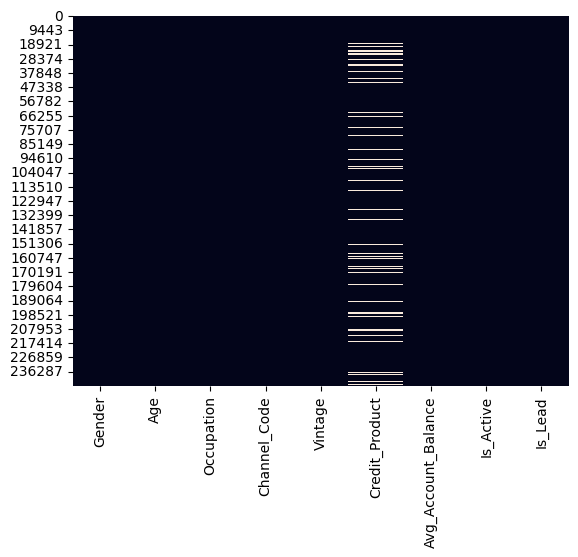

In [10]:
sns.heatmap(credit_card_cleaned.isnull(),cbar=False)


In [11]:
 #Percentage of the missing values
round((sum(credit_card_cleaned['Credit_Product'].isnull())/credit_card_cleaned.shape[0])*100,2)

11.62

In [12]:
#Imputing the missing values in "Credit_Product" feature using kNN imputer
from sklearn.impute import KNNImputer
Credit_Product_encoded = pd.get_dummies(credit_card_cleaned[['Credit_Product']],drop_first=True)

# use KNNImputer to impute missing values in the encoded column
imputer = KNNImputer(n_neighbors=2)
Credit_Product_imputed = pd.DataFrame(imputer.fit_transform(Credit_Product_encoded), columns=Credit_Product_encoded.columns)
credit_card_cleaned= pd.concat([credit_card_cleaned.drop('Credit_Product', axis=1), Credit_Product_encoded], axis=1)

In [13]:
credit_card_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237565 entries, 0 to 245724
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               237565 non-null  object
 1   Age                  237565 non-null  int64 
 2   Occupation           237565 non-null  object
 3   Channel_Code         237565 non-null  object
 4   Vintage              237565 non-null  int64 
 5   Avg_Account_Balance  237565 non-null  int64 
 6   Is_Active            237565 non-null  object
 7   Is_Lead              237565 non-null  int64 
 8   Credit_Product_Yes   237565 non-null  uint8 
dtypes: int64(4), object(4), uint8(1)
memory usage: 16.5+ MB


In [14]:
sns.pairplot(credit_card, hue = 'Is_Lead')


In [15]:
#Defining the predictors and target as X and y resp.
X = credit_card_cleaned.drop('Is_Lead', axis=1)
y = credit_card_cleaned['Is_Lead']

In [16]:
#Dropping the first category and Normalizing the predictors(X variables) for logistic and knn models
X_dummy = pd.get_dummies(X, drop_first=True)

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X_dummy)

X_rescaled = pd.DataFrame(X_, columns=X_dummy.columns)
X_rescaled.describe()

,Age,Vintage,Avg_Account_Balance,Credit_Product_Yes,Gender_Male,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Is_Active_Yes
count,237565.000000,237565.000000,237565.000000,237565.000000,237565.000000,237565.000000,237565.000000,237565.000000,237565.000000,237565.000000
mean,0.335339,0.316422,0.107245,0.285690,0.543708,0.300490,0.409787,0.280656,0.283518,0.385970
std,0.241373,0.251603,0.082567,0.451743,0.498087,0.458472,0.491795,0.449321,0.450707,0.486825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.112903,0.109375,0.056485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.322581,0.195312,0.084601,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.523438,0.130332,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#Method for printing the evaluation metrics 

def metrics (y_test,y_pred):
  print("\nConfusion matrix \n",confusion_matrix(y_test,y_pred),'\n')
  print("\nAccuracy, Recall and Precision \n",classification_report(y_test,y_pred))

###Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

In [20]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train.values, X_train)
logmodel_2=logit_model.fit()
print(logmodel_2.summary2())

Optimization terminated successfully.
         Current function value: 0.541956
         Iterations 6
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.002      
Dependent Variable:    y                  AIC:                180269.2290
Date:                  2023-04-22 05:36   BIC:                180369.4442
No. Observations:      166295             Log-Likelihood:     -90125.    
Df Model:              9                  LL-Null:            -90346.    
Df Residuals:          166285             LLR p-value:        1.3153e-89 
Converged:             1.0000             Scale:              1.0000     
No. Iterations:        6.0000                                            
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Age                      -2.1215   0.036

All the columns are statistically significant. Running the model with method LogisticRegression from scikit learn package to get all the necessary metrics

In [21]:
logis_reg = LogisticRegression(solver='liblinear')
logis_reg.fit(X_train,y_train)
y_pred_log=logis_reg.predict(X_test)

logit_roc_auc = roc_auc_score(y_test, logis_reg.predict_proba(X_test)[:,1])


rpt_logistic = classification_report(y_test,y_pred_log,output_dict=True)
print("\nConfusion matrix \n",confusion_matrix(y_test,y_pred_log),'\n')
print("ROC AUC: %0.2f "  %logit_roc_auc)


Confusion matrix 
 [[53987   914]
 [14711  1658]] 

ROC AUC: 0.73 


### k Nearest Neighbor

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# Subsample the large training data to a size of 10,000 for the KNN model.
subsample_size = 6000
np.random.seed(1)
subsample_idx = np.random.choice(range(len(X_train)), size=subsample_size, replace=False)
X_subsample = X_train.iloc[subsample_idx]
y_subsample = y_train.iloc[subsample_idx]


In [24]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_subsample, y_subsample)
y_pred_knn = knn.predict(X_test)
print('ROC AUC: %0.2f' %roc_auc_score(y_test,knn.predict_proba(X_test)[:,1]))


ROC AUC: 0.70


optimum k value is :  45


<Axes: >

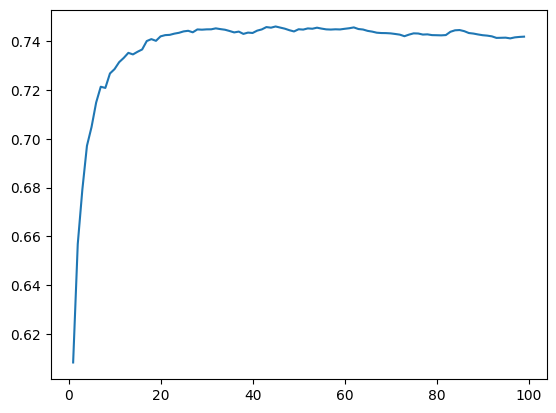

In [25]:
from sklearn.model_selection import cross_val_score
max_K = 100
cv_scores = [ ]

for K in range(1,max_K):
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_subsample, y_subsample.values.ravel(),cv = 3,scoring = "roc_auc")
    cv_scores.append(scores.mean())

print("optimum k value is : ",cv_scores.index(max(cv_scores))+1)
sns.lineplot(x=range(1,max_K), y=cv_scores)

In [26]:
#Running the kNN model with the optimum k from cross validation
knn = KNeighborsClassifier(n_neighbors=45, metric='euclidean')
knn.fit(X_subsample, y_subsample)

y_pred_knn = knn.predict(X_test)
knn_roc_auc = roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])

rpt_knn = classification_report(y_test,y_pred_knn,output_dict=True)
print("\nConfusion matrix \n",confusion_matrix(y_test,y_pred_knn),'\n')
print('ROC AUC: %0.2f' %knn_roc_auc)



Confusion matrix 
 [[53539  1362]
 [14016  2353]] 

ROC AUC: 0.75


### Random Forest

In [27]:
# Random Forest model is not affected by multicollinearity
# Need to keep all dummy variables
X_ens = pd.get_dummies(X)

In [28]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest and other ensemble methods do not require scaling because their splitting is based on values. Using unscaled predictors to split the data
# reference - https://towardsdatascience.com/how-data-normalization-affects-your-random-forest-algorithm-fbc6753b4ddf#:~:text=Stack%20Overflow%3A%20(1)%20No,does%20not%20require%20feature%20scaling.

X_train_ens,X_test_ens, y_train_ens, y_test_ens = train_test_split(X_ens, y, test_size=0.3, random_state=1)


In [29]:
# Random Forest

rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train_ens,y_train_ens)

y_pred_rf = rf_model.predict(X_test_ens)
rf_roc_auc = roc_auc_score(y_test_ens, rf_model.predict_proba(X_test_ens)[:,1])

print("\nConfusion matrix \n",confusion_matrix(y_test,y_pred_rf),'\n')
rpt_rf = classification_report(y_test_ens,y_pred_rf,output_dict=True)
print("ROC AUC %0.2f" %rf_roc_auc)




Confusion matrix 
 [[54828    73]
 [14979  1390]] 

ROC AUC 0.77


### Boosted Tree 

In [30]:
# Boosted tree model

from sklearn.ensemble import AdaBoostClassifier

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train_ens,y_train_ens)

y_pred_bt = bt_model.predict(X_test_ens)
bt_roc_auc = roc_auc_score(y_test_ens, bt_model.predict_proba(X_test_ens)[:,1])

rpt_bt = classification_report(y_test_ens,y_pred_bt,output_dict=True)
print("\nConfusion matrix \n",confusion_matrix(y_test,y_pred_bt),'\n')
print('ROC AUC: %0.2f' %bt_roc_auc)



Confusion matrix 
 [[52983  1918]
 [13283  3086]] 

ROC AUC: 0.76


### Naive Bayes 

In [31]:
from sklearn.naive_bayes import MultinomialNB 

In [32]:
nb_model = MultinomialNB(alpha=0.01)
nb_model.fit(X_train_ens, y_train_ens) 

y_pred_nb = nb_model.predict(X_test_ens)


In [33]:
nb_roc_auc = roc_auc_score(y_test_ens, nb_model.predict_proba(X_test_ens)[:,1])

print("\nConfusion matrix \n",confusion_matrix(y_test,y_pred_nb),'\n')
print('ROC AUC: %0.2f' %nb_roc_auc)
rpt_nb = classification_report(y_test_ens,y_pred_nb,output_dict=True)



Confusion matrix 
 [[34444 20457]
 [ 6770  9599]] 

ROC AUC: 0.63


In [34]:
# run once to install eli5 package

!pip install eli5 #uncomment to install the package

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(nb_model, random_state=1).fit(X_test_ens, y_test_ens)
eli5.show_weights(perm, feature_names = X_test_ens.columns.tolist())

Weight,Feature
0.0854 ± 0.0028,Vintage
0.0159 ± 0.0016,Age
0.0074 ± 0.0007,Channel_Code_X1
0.0018 ± 0.0003,Channel_Code_X3
0.0014 ± 0.0006,Occupation_Salaried
0.0010 ± 0.0003,Channel_Code_X2
0.0010 ± 0.0001,Is_Active_No
0.0008 ± 0.0002,Credit_Product_Yes
0.0007 ± 0.0002,Is_Active_Yes
0.0005 ± 0.0002,Gender_Female


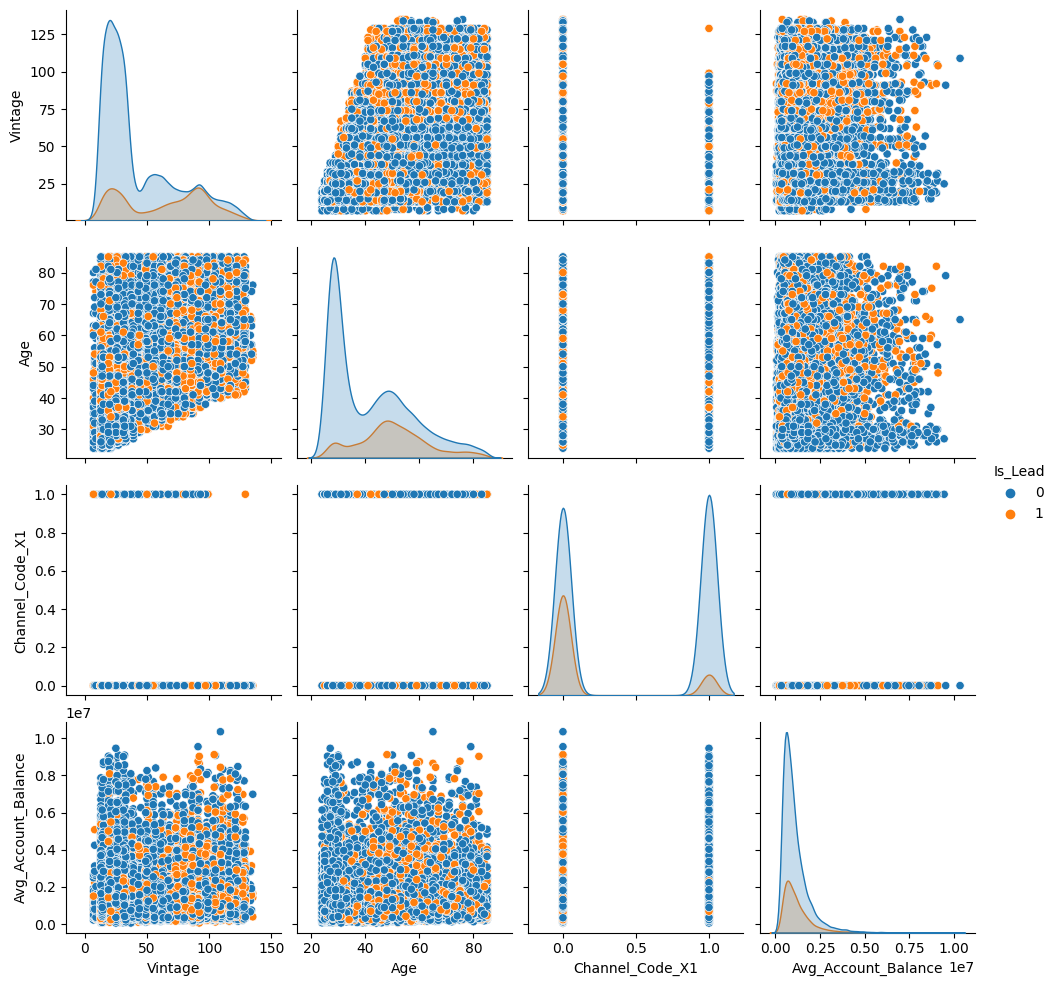

In [36]:
x_y = pd.concat([X_test_ens,y_test_ens], axis=1)

sns.pairplot(x_y[['Vintage','Age','Channel_Code_X1','Avg_Account_Balance','Is_Lead']], hue='Is_Lead')


The pairplot histograms reveal several insights:

1. Customers aged 40 to 60 have a similar frequency, and therefore an equivalent chance of accepting or rejecting the credit card recommendation.
2. Customers with a vintage of approximately 90 to 100 months express comparable interest in accepting or rejecting the credit card.
3. Customers utilizing channel code X1 demonstrate lower levels of interest in the credit card than those using other channels.

### ANN model

In [59]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
#normalizing the dataset for simple ANN and complex deep learning model 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_ens)

X_train_dl = scaler.transform(X_train_ens)
X_test_dl = scaler.transform(X_test_ens)
y_train_dl = y_train_ens
y_test_dl = y_test_ens


In [60]:
X_train_dl.shape

(166295, 14)

In [172]:
## Building a sequential neural netowrk

# Define the model architecture
model = Sequential()
model.add(Dense(units=80, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=40, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=20, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

In [173]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [174]:
# Define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [175]:
# Train the model
model.fit(x=X_train_dl, 
          y=y_train_dl, 
          batch_size=128,
          epochs=150,
          validation_data=(X_test_dl, y_test_dl), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/150
1300/1300 [==============================] - 10s 5ms/step - loss: 0.5088 - val_loss: 0.4622
Epoch 2/150
1300/1300 [==============================] - 6s 5ms/step - loss: 0.4783 - val_loss: 0.4536
Epoch 3/150
1300/1300 [==============================] - 5s 4ms/step - loss: 0.4697 - val_loss: 0.4493
Epoch 4/150
1300/1300 [==============================] - 5s 4ms/step - loss: 0.4658 - val_loss: 0.4481
Epoch 5/150
1300/1300 [==============================] - 7s 5ms/step - loss: 0.4624 - val_loss: 0.4460
Epoch 6/150
1300/1300 [==============================] - 5s 4ms/step - loss: 0.4604 - val_loss: 0.4457
Epoch 7/150
1300/1300 [==============================] - 5s 4ms/step - loss: 0.4598 - val_loss: 0.4429
Epoch 8/150
1300/1300 [==============================] - 7s 5ms/step - loss: 0.4587 - val_loss: 0.4434
Epoch 9/150
1300/1300 [==============================] - 5s 4ms/step - loss: 0.4581 - val_loss: 0.4439
Epoch 10/150
1300/1300 [==============================] - 6s 5ms/step - 

<Axes: >

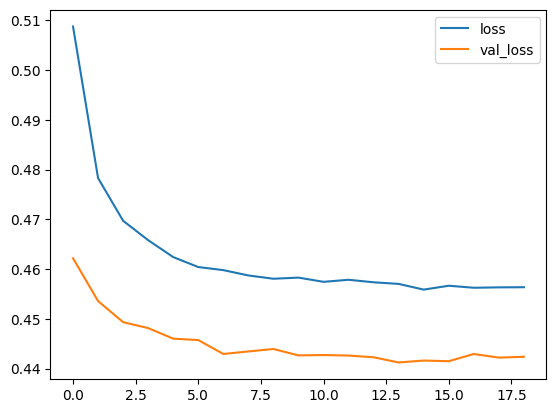

In [176]:
# Plot the training and validation losses versus epochs
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [177]:
y_pred_dl =(model.predict(X_test_dl) > 0.5).astype("int32")

2228/2228 [==============================] - 3s 1ms/step


In [178]:
print(confusion_matrix(y_test_dl,y_pred_dl))

[[54778   123]
 [14815  1554]]


### Classification Report

In [189]:
rpt_ann = classification_report(y_test_dl,y_pred_dl,output_dict=True)
ann_roc_auc = roc_auc_score(y_test_dl,model.predict(X_test_dl))
print('ROC AUC: ', ann_roc_auc)

2228/2228 [==============================] - 7s 3ms/step
ROC AUC:  0.7784081468102773


### ROC AUC

2228/2228 [==============================] - 3s 2ms/step


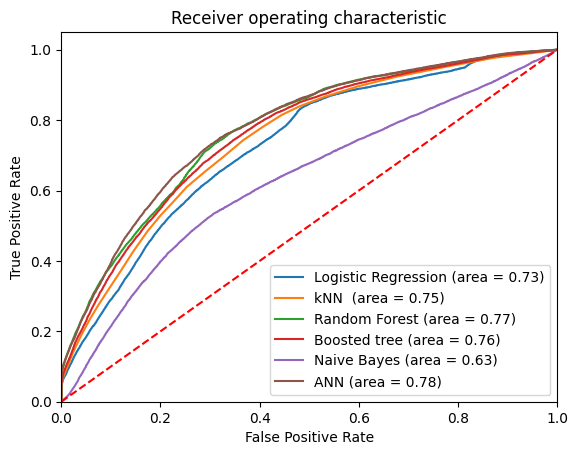

In [180]:
#logistic regression 
log_fpr, log_tpr, log_thresholds = roc_curve(y_test, logis_reg.predict_proba(X_test)[:,1])

#kNN model
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

#Random Forrest
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test_ens, rf_model.predict_proba(X_test_ens)[:,1])

#Boosted Tree
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test_ens, bt_model.predict_proba(X_test_ens)[:,1])

#Naive Bayes
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test_ens, nb_model.predict_proba(X_test_ens)[:,1])

#Ann 
ann_fpr, ann_tpr, ann_thresholds = roc_curve(y_test_dl, model.predict(X_test_dl))

plt.figure()

plt.plot(log_fpr, log_tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='kNN  (area = %0.2f)' % knn_roc_auc)

plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot(ann_fpr, ann_tpr, label='ANN (area = %0.2f)' % ann_roc_auc)



plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Summarizing the results of Preliminary tests

In [190]:
# Convert classification reports to dataframes

df1 = pd.DataFrame(rpt_rf).transpose()
df2 = pd.DataFrame(rpt_bt).transpose()
df3 = pd.DataFrame(rpt_nb).transpose()
df4 = pd.DataFrame(rpt_logistic).transpose()
df5 = pd.DataFrame(rpt_knn).transpose()
df6 = pd.DataFrame(rpt_ann).transpose()

# Concatenate the dataframes
df_combined = pd.concat([df1, df2, df3,df4,df5,df6], axis=0, keys=["random forest", "boosted tree", "naive bayes","Logistic regression","knn","ann"])
df_combined

precision    recall  f1-score       support
random forest       0              0.785423  0.998670  0.879302  54901.000000
                    1              0.950103  0.084917  0.155900  16369.000000
                    accuracy       0.788803  0.788803  0.788803      0.788803
                    macro avg      0.867763  0.541793  0.517601  71270.000000
                    weighted avg   0.823246  0.788803  0.713154  71270.000000
boosted tree        0              0.799550  0.965064  0.874545  54901.000000
                    1              0.616707  0.188527  0.288776  16369.000000
                    accuracy       0.786713  0.786713  0.786713      0.786713
                    macro avg      0.708128  0.576796  0.581660  71270.000000
                    weighted avg   0.757556  0.786713  0.740008  71270.000000
naive bayes         0              0.835735  0.627384  0.716725  54901.000000
                    1              0.319371  0.586413  0.413527  16369.000000
                    accuracy       0.617974  0.617974  0.617974      0.617974
                    macro avg      0.577553  0.606899  0.565126  71270.000000
                    weighted avg   0.717139  0.617974  0.647088  71270.000000
Logistic regression 0              0.785860  0.983352  0.873583  54901.000000
                    1              0.644635  0.101289  0.175070  16369.000000
                    accuracy       0.780763  0.780763  0.780763      0.780763
                    macro avg      0.715247  0.542320  0.524327  71270.000000
                    weighted avg   0.753424  0.780763  0.713151  71270.000000
knn                 0              0.792525  0.975192  0.874420  54901.000000
                    1              0.633378  0.143747  0.234316  16369.000000
                    accuracy       0.784229  0.784229  0.784229      0.784229
                    macro avg      0.712951  0.559470  0.554368  71270.000000
                    weighted avg   0.755973  0.784229  0.727404  71270.000000
ann                 0              0.787119  0.997760  0.880010  54901.000000
                    1              0.926655  0.094936  0.172227  16369.000000
                    accuracy       0.790403  0.790403  0.790403      0.790403
                    macro avg      0.856887  0.546348  0.526118  71270.000000
                    weighted avg   0.819167  0.790403  0.717449  71270.000000


1. Random Forest has the highest precision score (0.95) among all the models, but it also has the lowest recall value (0.08).

2. Naive Bayes model performs well in terms of recall (0.58) and f1 score (0.41), but may not be the best option for precision-oriented tasks.

3. Considering the dataset's imbalanced nature, ROC AUC metrics is selected as the decisive measure. 

4. The main objective is to increase the number of customers who are interested in purchasing a credit card while simultaneously reducing marketing costs spent on customers who are mistakenly identified as interested (false negatives). Therefore, it is important to prioritize models with high precision scores.

5. The ANN model stands out with its high precision score and superior ROC AUC value compared to other models. This suggests that the ANN model is more effective at distinguishing between credit card recommendation acceptances and rejections. Consequently, the ANN model can more accurately identify interested customers, resulting in a reduced marketing cost for uninterested customers.